In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats

In [3]:
df_cfpdss = pd.read_csv("./cfpdss/cfpdss.csv")
df_cfpdss.head()

,c5,c6,c7,c8,c9,n0,n1,n2,n3,n4,class
0,a,a,b,a,a,0.448573,1.212644,2.555515,0.242702,0.697604,A
1,a,a,a,b,b,1.902515,-0.467349,-0.744523,-0.017156,-0.380288,A
2,a,a,a,b,b,0.825045,1.002267,1.972207,-0.790095,0.233456,B
3,a,a,a,b,b,-0.124974,0.902601,1.696092,-0.320182,0.243261,A
4,b,a,a,b,a,-1.259765,0.793134,1.547527,-2.132172,-0.788367,B


In [4]:
cat_cols = ["c5", "c6", "c7", "c8", "c9"]
encoder = OneHotEncoder(sparse=False, drop="if_binary", dtype=np.int32)
encoded_categorical = encoder.fit_transform(df_cfpdss[cat_cols])
columns = encoder.get_feature_names_out()
cat_cols_encoded = pd.DataFrame(encoded_categorical, columns=columns)
num_cols = ["n0", "n1", "n2", "n3", "n4"]
X = pd.concat([cat_cols_encoded, df_cfpdss[num_cols]], axis=1)
X

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,c5_b,c6_b,c7_b,c8_b,c9_b,n0,n1,n2,n3,n4
0,0,0,1,0,0,0.448573,1.212644,2.555515,0.242702,0.697604
1,0,0,0,1,1,1.902515,-0.467349,-0.744523,-0.017156,-0.380288
2,0,0,0,1,1,0.825045,1.002267,1.972207,-0.790095,0.233456
3,0,0,0,1,1,-0.124974,0.902601,1.696092,-0.320182,0.243261
4,1,0,0,1,0,-1.259765,0.793134,1.547527,-2.132172,-0.788367
...,...,...,...,...,...,...,...,...,...,...
12995,0,1,1,1,0,-1.259309,-2.780877,-5.843740,-2.715839,-2.509596
12996,0,0,0,0,0,-0.129184,-0.629300,-1.315978,0.856377,0.113542
12997,1,1,1,0,1,-1.623399,-1.860928,-4.123079,0.073927,-1.146070
12998,0,0,0,1,1,0.229875,-0.095758,-0.150269,-0.905269,-0.391985


In [5]:
y_df = df_cfpdss["class"]
y_encoder = OneHotEncoder(sparse_output=False, drop="if_binary", dtype=np.int32)
labels = y_df.values.reshape(-1, 1)
y_encoded = y_encoder.fit_transform(labels)
columns = ["class"]
y = pd.DataFrame(y_encoded, columns=columns)
y.head()

,class
0,0
1,0
2,1
3,0
4,1


In [6]:
X_ref, X_test, y_ref, y_test = train_test_split(
    X,
    y,
    train_size=0.1,
    test_size=0.9,
    shuffle=False,
    random_state=0,
)

In [7]:
model = LogisticRegression()
model.fit(X_ref, y_ref)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [8]:
from river import drift

adwin = drift.ADWIN()

for index, row in y.iterrows():
    adwin.update(row)
    if adwin.drift_detected:
        print(f"Change detected at index {index}, input value: {row}")

Change detected at index 5119, input value: class    1
Name: 5119, dtype: int32
Change detected at index 6431, input value: class    0
Name: 6431, dtype: int32
Change detected at index 7231, input value: class    0
Name: 7231, dtype: int32


/opt/homebrew/lib/python3.11/site-packages/river/drift/adwin.py:135: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self._drift_detected = self._helper.update(x)


In [9]:
y_test.shape

(11700, 1)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

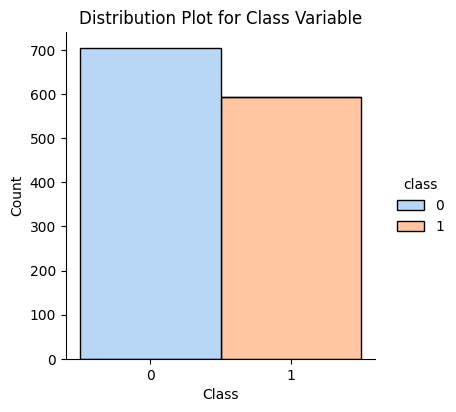

In [12]:
sns.displot(
    y_ref,
    x="class",
    hue="class",
    kind="hist",
    discrete=True,
    multiple="stack",
    height=4,
    aspect=1,
    palette="pastel",
)
plt.title("Distribution Plot for Class Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

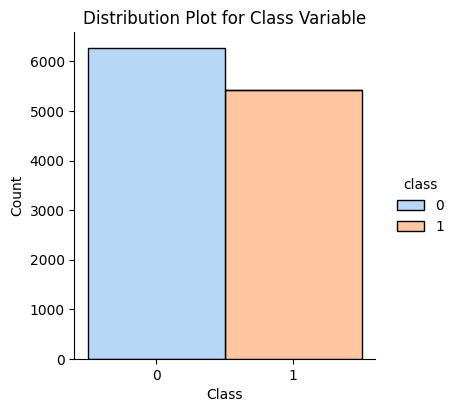

In [13]:
sns.displot(
    y_test,
    x="class",
    hue="class",
    kind="hist",
    discrete=True,
    multiple="stack",
    height=4,
    aspect=1,
    palette="pastel",
)
plt.title("Distribution Plot for Class Variable")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

KS Test between reference sample and sample 1: KstestResult(statistic=0.09307692307692307, pvalue=2.5390659159498898e-05, statistic_location=0, statistic_sign=1)


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

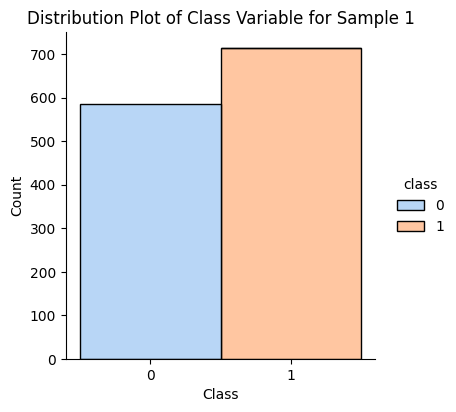

KS Test between reference sample and sample 2: KstestResult(statistic=0.010425771303369457, pvalue=0.9999992318298707, statistic_location=0, statistic_sign=-1)
KS Test between reference sample and sample 3: KstestResult(statistic=0.008819802214721383, pvalue=0.9999999981825192, statistic_location=0, statistic_sign=1)
KS Test between reference sample and sample 4: KstestResult(statistic=0.055009178658139396, pvalue=0.03721188897963236, statistic_location=0, statistic_sign=1)


/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserW

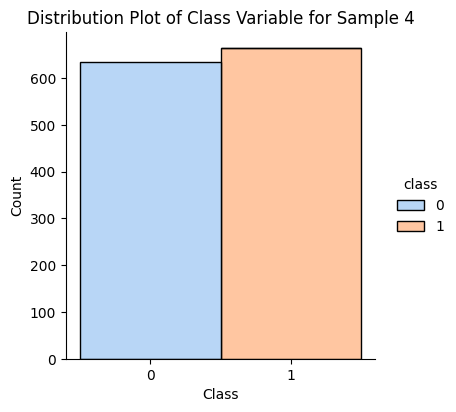

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


KS Test between reference sample and sample 5: KstestResult(statistic=0.10973293065671819, pvalue=2.63966179217302e-07, statistic_location=0, statistic_sign=-1)


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


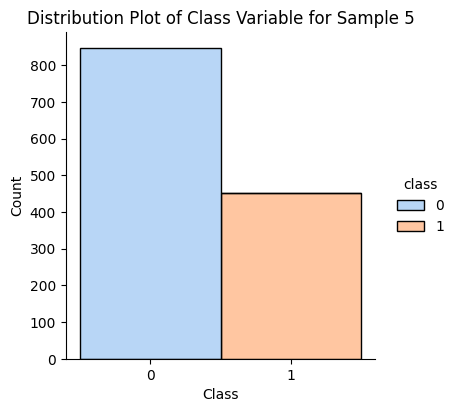

KS Test between reference sample and sample 6: KstestResult(statistic=0.028835198673535855, pvalue=0.6366085461734913, statistic_location=0, statistic_sign=1)
KS Test between reference sample and sample 7: KstestResult(statistic=0.01266891691833955, pvalue=0.9998934579504203, statistic_location=0, statistic_sign=1)
KS Test between reference sample and sample 8: KstestResult(statistic=0.02890152188073666, pvalue=0.6329351085071512, statistic_location=0, statistic_sign=-1)
KS Test between reference sample and sample 9: KstestResult(statistic=0.006510333392550483, pvalue=0.9999999999999958, statistic_location=0, statistic_sign=1)


In [36]:
sample_ref = y_ref["class"].values
j = 0
for i in range(1, 10):
    s_i = y_test[j : 1300 * i]
    j = (i * 1300) + 1
    sample_i = s_i["class"].values
    res = stats.ks_2samp(sample_ref, sample_i)
    print("KS Test between reference sample and sample {}: {}".format(i, res))
    if res.pvalue < 0.05:
        sns.displot(
            s_i,
            x="class",
            hue="class",
            kind="hist",
            discrete=True,
            multiple="stack",
            height=4,
            aspect=1,
            palette="pastel",
        )
        plt.title("Distribution Plot of Class Variable for Sample {}".format(i))
        plt.xlabel("Class")
        plt.ylabel("Count")
        plt.xticks([0, 1])
        plt.show()